<a href="https://colab.research.google.com/github/pawelrat009/ML2025-1/blob/main/PUM8_drzewa_decyzyjne_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Zwizualizuj dane
2. Sprawdź, który z podziałów jest lepszy w przypadku miary entropii:
a) petal width (cm)na poziomie: 1.5
b) petal width (cm)na poziomie: 0.38
Podaj zysk informacyjny na każdym z podziałów
3. Zaimplementuj drzewo decyzyjne i las losowy (złożony z 15 drzew); przetestuj na 30%
zbiorze testowym
sklearn.ensemble.RandomForestClassifier
sklearn.tree.DecisionTreeClassifier

In [29]:
from sklearn import datasets
data = datasets.load_iris()

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# wczytanie danych
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns=data['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


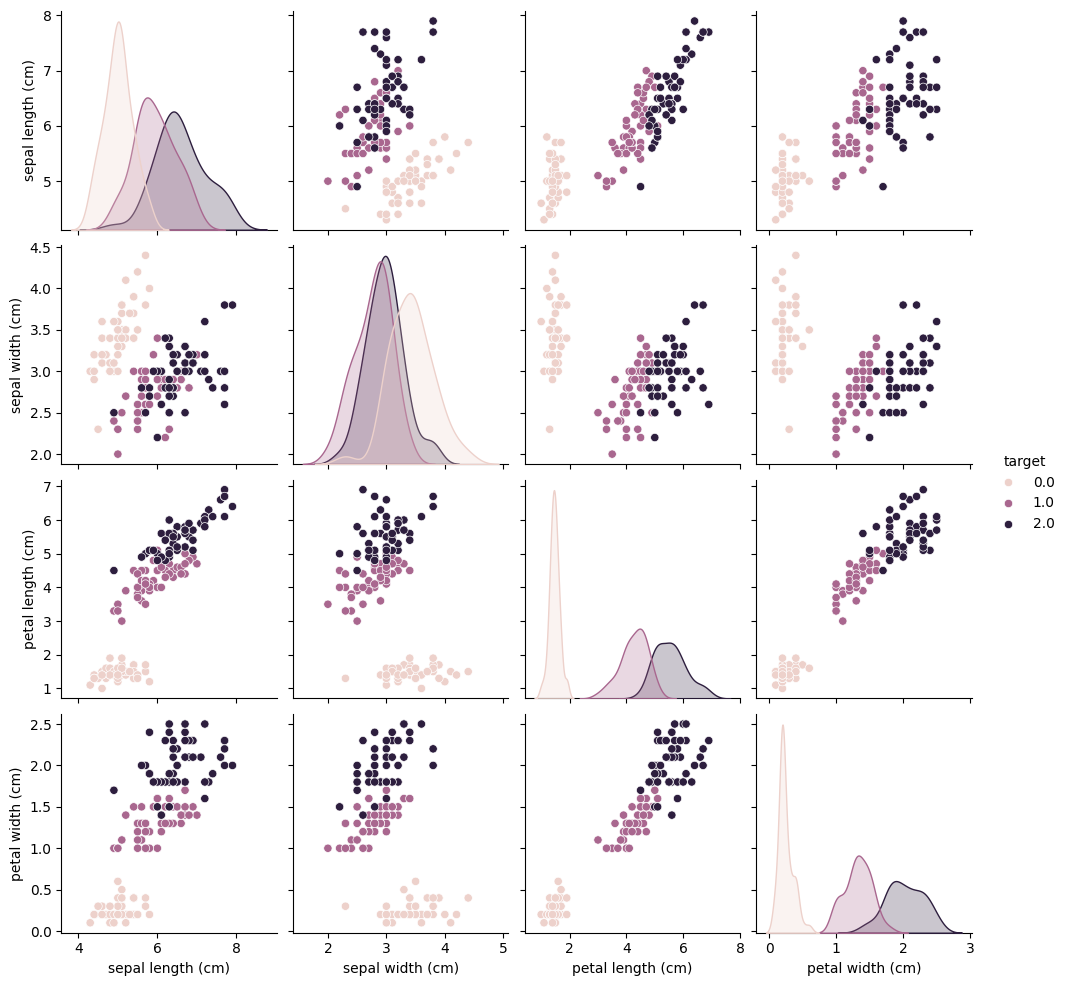

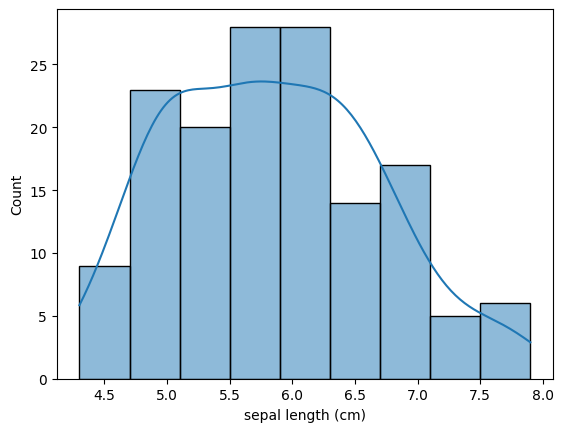

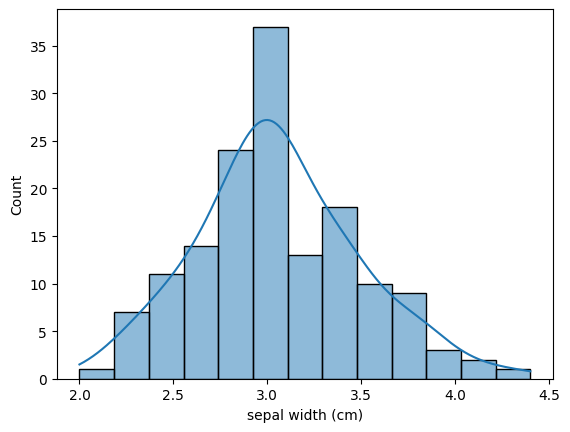

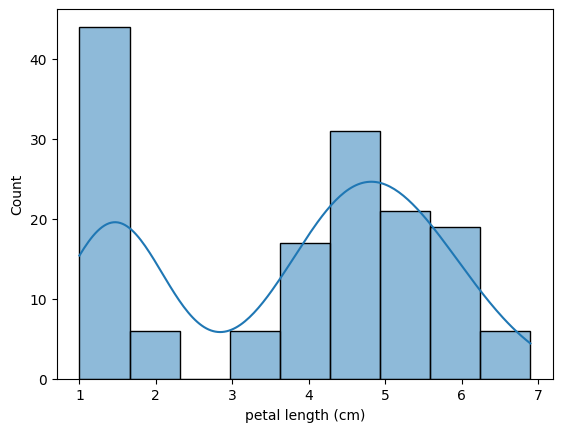

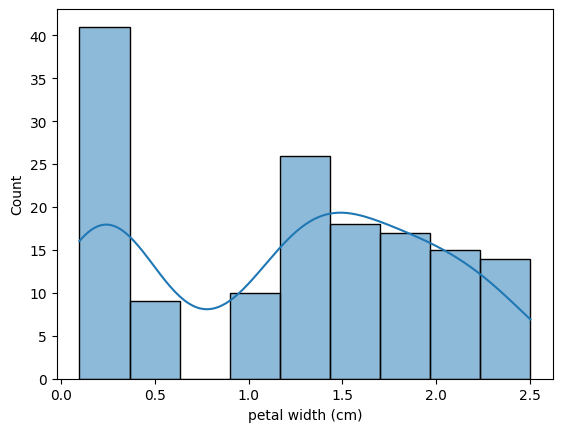

In [32]:
# wizualizacja danych
sns.pairplot(df, hue='target')
plt.show()
# rozkład normalny
for feature in data['feature_names']:
    sns.histplot(df[feature], kde=True)
    plt.show()

In [33]:
# Sprawdź, który z podziałów jest lepszy w przypadku miary entropii:

# funkcja do obliczania entropii
def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / counts.sum()
    ent = -np.sum(probabilities * np.log2(probabilities))
    return ent

# funkcja do obliczania zysku informacyjnego
def information_gain(labels_parent, labels_left, labels_right):
  p_left = len(labels_left) / len(labels_parent)
  p_right = len(labels_right) / len(labels_parent)
  ig = entropy(labels_parent) - (p_left * entropy(labels_left) + p_right * entropy(labels_right))
  return ig

#a) petal width (cm)na poziomie: 1.5

left_a = df[df['petal width (cm)'] <= 1.5]['target']
right_a = df[df['petal width (cm)'] > 1.5]['target']

print()
print("dla podziału na poziomie 1.5")
print(f"entropia przed podziałem: {entropy(df['target'])}")
print(f"entropia podziału <= 1.5: {entropy(left_a)}")
print(f"entropia podziału > 1.5: {entropy(right_a)}")
print(f"zysk informacyjny:{information_gain(df['target'], left_a, right_a)}")

#b) petal width (cm)na poziomie: 0.38
left_a = df[df['petal width (cm)'] <= 0.38]['target']
right_a = df[df['petal width (cm)'] > 0.38]['target']
print()
print("dla podziału na poziomie 0.38")
print(f"entropia przed podziałem: {entropy(df['target'])}")
print(f"entropia podziału <= 0.38: {entropy(left_a)}")
print(f"entropia podziału > 0.38: {entropy(right_a)}")
print(f"zysk informacyjny:{information_gain(df['target'], left_a, right_a)}")

#Podaj zysk informacyjny na każdym z podziałów


dla podziału na poziomie 1.5
entropia przed podziałem: 1.584962500721156
entropia podziału <= 1.5: 1.1649028407913813
entropia podziału > 1.5: 0.4566836315394428
zysk informacyjny:0.6655756524704468

dla podziału na poziomie 0.38
entropia przed podziałem: 1.584962500721156
entropia podziału <= 0.38: -0.0
entropia podziału > 0.38: 1.3285976826626762
zysk informacyjny:0.6195148513196114


In [34]:
#Zaimplementuj drzewo decyzyjne i las losowy (złożony z 15 drzew); przetestuj na 30% zbiorze testowym
#import sklearn.ensemble.RandomForestClassifier
#sklearn.tree.DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# drzewo decyzyjne
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)

# las losowy
rf = RandomForestClassifier(n_estimators=15)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


print(f"Dokładność drzewa decyzyjnego: {accuracy_dtree}")
print(f"Dokładność lasu losowego: {accuracy_rf}")

Dokładność drzewa decyzyjnego: 1.0
Dokładność lasu losowego: 1.0
